## **Sentiment Analysis, Model building and Prediction**

---



In this notebook we performed Sentiment Analysis of tweets for extracted shows for each user and then deep learning models are created. MLP models and Single layer models are created and results are evaluated. Recommendations are then made based on predicted sentiment scores for a user.

In [1]:
# Install all libraries required to run the file
!pip install vaderSentiment
!pip install textblob
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install sklearn
!pip install keras

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
# Import libraries required to run the file
import re 
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import csv
import plotly
import re


# combining datasets

In [18]:
# # Read the TSV file, specifying the correct delimiter and handling errors
# df = pd.read_csv("C:/Users/Karthik/Downloads/Amazon review data/amazon_reviews_us_Electronics_v1_00.tsv/amazon_reviews_us_Electronics_v1_00.tsv", delimiter='\t', error_bad_lines=False)

# df=df[df['total_votes'] != 0]

# df= df.dropna()

# df= df[(df['helpful_votes'] != 0)]

# df = df[df['verified_purchase'] != 'N']

# df

In [19]:
import pandas as pd

def preprocess_dataset(file_path):
    # Read the TSV file, specifying the correct delimiter and handling errors
    df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False)
    
    # Remove rows where total_votes = 0
    df = df[df['total_votes'] != 0]
    
    # Drop rows with missing values
    df = df.dropna()
    
    # Keep rows where helpful_votes != 0
    df = df[df['helpful_votes'] != 0]
    
    # Keep rows where verified_purchase is not 'N'
    df = df[df['verified_purchase'] != 'N']
    
    return df

In [22]:
df1 = preprocess_dataset("C:/Users/Karthik/Downloads/Amazon review data/amazon_reviews_us_Electronics_v1_00.tsv/amazon_reviews_us_Electronics_v1_00.tsv")

C:\Users\Karthik\AppData\Local\Temp\ipykernel_5392\3549033262.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False)
Skipping line 9076: expected 15 fields, saw 22
Skipping line 19256: expected 15 fields, saw 22
Skipping line 24313: expected 15 fields, saw 22
Skipping line 47211: expected 15 fields, saw 22
Skipping line 54295: expected 15 fields, saw 22
Skipping line 56641: expected 15 fields, saw 22
Skipping line 63067: expected 15 fields, saw 22

Skipping line 93796: expected 15 fields, saw 22

Skipping line 132806: expected 15 fields, saw 22
Skipping line 164631: expected 15 fields, saw 22
Skipping line 167019: expected 15 fields, saw 22
Skipping line 167212: expected 15 fields, saw 22

Skipping line 198103: expected 15 fields, saw 22
Skipping line 199191: expected 15 fields, saw 22
Skipping line 202841: expected 15 fields, sa

In [23]:
df2 = preprocess_dataset("C:/Users/Karthik/Downloads/Amazon review data/amazon_reviews_us_Health_Personal_Care_v1_00.tsv/amazon_reviews_us_Health_Personal_Care_v1_00.tsv")

C:\Users\Karthik\AppData\Local\Temp\ipykernel_5392\3549033262.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False)
Skipping line 10317: expected 15 fields, saw 22
Skipping line 40632: expected 15 fields, saw 22
Skipping line 49643: expected 15 fields, saw 22
Skipping line 54096: expected 15 fields, saw 22
Skipping line 63958: expected 15 fields, saw 22
Skipping line 64322: expected 15 fields, saw 22

Skipping line 112718: expected 15 fields, saw 22

Skipping line 156739: expected 15 fields, saw 22
Skipping line 158865: expected 15 fields, saw 22
Skipping line 192178: expected 15 fields, saw 22

Skipping line 228364: expected 15 fields, saw 22
Skipping line 228763: expected 15 fields, saw 22
Skipping line 233558: expected 15 fields, saw 22
Skipping line 234939: expected 15 fields, saw 22
Skipping line 247329: expected 15 fields,

Skipping line 1983160: expected 15 fields, saw 22
Skipping line 1995146: expected 15 fields, saw 22
Skipping line 2012702: expected 15 fields, saw 22

Skipping line 2046560: expected 15 fields, saw 22
Skipping line 2047222: expected 15 fields, saw 22
Skipping line 2048048: expected 15 fields, saw 22
Skipping line 2051893: expected 15 fields, saw 22
Skipping line 2060002: expected 15 fields, saw 22
Skipping line 2061381: expected 15 fields, saw 22
Skipping line 2074807: expected 15 fields, saw 22
Skipping line 2080379: expected 15 fields, saw 22
Skipping line 2092019: expected 15 fields, saw 22
Skipping line 2093691: expected 15 fields, saw 22

Skipping line 2130657: expected 15 fields, saw 22
Skipping line 2150689: expected 15 fields, saw 22
Skipping line 2160908: expected 15 fields, saw 22

Skipping line 2170439: expected 15 fields, saw 22
Skipping line 2174557: expected 15 fields, saw 22
Skipping line 2179858: expected 15 fields, saw 22
Skipping line 2181495: expected 15 fields, saw 

In [24]:
df3 = preprocess_dataset("C:/Users/Karthik/Downloads/Amazon review data/amazon_reviews_us_Grocery_v1_00.tsv/amazon_reviews_us_Grocery_v1_00.tsv")

C:\Users\Karthik\AppData\Local\Temp\ipykernel_5392\3549033262.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False)
Skipping line 1925: expected 15 fields, saw 22
Skipping line 1977: expected 15 fields, saw 22
Skipping line 35265: expected 15 fields, saw 22
Skipping line 53357: expected 15 fields, saw 22

Skipping line 68361: expected 15 fields, saw 22
Skipping line 70922: expected 15 fields, saw 22
Skipping line 73503: expected 15 fields, saw 22
Skipping line 85612: expected 15 fields, saw 22
Skipping line 102322: expected 15 fields, saw 22

Skipping line 158341: expected 15 fields, saw 22
Skipping line 162872: expected 15 fields, saw 22
Skipping line 195697: expected 15 fields, saw 22

Skipping line 202916: expected 15 fields, saw 22
Skipping line 203949: expected 15 fields, saw 22
Skipping line 250853: expected 15 fields, saw

In [25]:
df4 = preprocess_dataset("C:/Users/Karthik/Downloads/Amazon review data/amazon_reviews_us_Beauty_v1_00.tsv/amazon_reviews_us_Beauty_v1_00.tsv")

C:\Users\Karthik\AppData\Local\Temp\ipykernel_5392\3549033262.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False)
Skipping line 10093: expected 15 fields, saw 22
Skipping line 31965: expected 15 fields, saw 22
Skipping line 49886: expected 15 fields, saw 22
Skipping line 49905: expected 15 fields, saw 22

Skipping line 67579: expected 15 fields, saw 22
Skipping line 75367: expected 15 fields, saw 22
Skipping line 92462: expected 15 fields, saw 22
Skipping line 105041: expected 15 fields, saw 22
Skipping line 109697: expected 15 fields, saw 22
Skipping line 121931: expected 15 fields, saw 22

Skipping line 139492: expected 15 fields, saw 22
Skipping line 158729: expected 15 fields, saw 22
Skipping line 165784: expected 15 fields, saw 22
Skipping line 176996: expected 15 fields, saw 22
Skipping line 182928: expected 15 fields, s

Skipping line 1979093: expected 15 fields, saw 22
Skipping line 1982997: expected 15 fields, saw 22
Skipping line 1992924: expected 15 fields, saw 22
Skipping line 1996161: expected 15 fields, saw 22
Skipping line 2003175: expected 15 fields, saw 22
Skipping line 2024153: expected 15 fields, saw 22
Skipping line 2026345: expected 15 fields, saw 22

Skipping line 2041159: expected 15 fields, saw 22
Skipping line 2042954: expected 15 fields, saw 22
Skipping line 2044244: expected 15 fields, saw 22
Skipping line 2047949: expected 15 fields, saw 22
Skipping line 2051022: expected 15 fields, saw 22
Skipping line 2052365: expected 15 fields, saw 22
Skipping line 2064460: expected 15 fields, saw 22
Skipping line 2077010: expected 15 fields, saw 22
Skipping line 2083893: expected 15 fields, saw 22

Skipping line 2097514: expected 15 fields, saw 22
Skipping line 2100479: expected 15 fields, saw 22
Skipping line 2103183: expected 15 fields, saw 22
Skipping line 2108608: expected 15 fields, saw 2

In [27]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31
1,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31
2,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Bookshelf Loudspeakers,Electronics,5,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,2015-08-31
3,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB and iPod Digital Interface (Black),Electronics,2,4.0,5.0,N,Y,It does not copy CD-R s to USB as advertised ...,It does not copy CD-R s to USB as advertised. My CD's were recorded on a Sony machine and properly finalized. They copy on other machines.<br />It repeatedly shows &#34;copy protected wait&#34;.<b...,2015-08-31
4,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,2,1.0,1.0,N,Y,"Did not last long, Stop working within a year ...","Did not last long, Stop working within a year.",2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478254,US,49527495,R2646S9QB77229,B000050FDQ,168516715,Braun 7526 Syncro Shaver System with Clean & Charge Storage Stand,Beauty,5,5.0,6.0,N,Y,Another great Braun product...,I've been using Braun shavers for about 8 years now and this one really takes it to the next level. Perhaps my biggest complaint with electric shavers has been cleaning them--no more with this new...,2001-01-23
4478255,US,53094487,R2PF35TSQS67UZ,B000050FF2,678848064,Homedics Envirascape Sound Spa Alarm Clock Radio,Beauty,3,106.0,109.0,N,Y,"For the price, a good unit",I've had more than my share of these things over the last couple of years. Either they're badly designed (I had one that looked like a flying saucer. Another looked like something you'd use to s...,2001-01-14
4478256,US,52928084,R10PLGJXPJDVAL,B000050FEO,4337406,HoMedics Bubble Spa Massaging Bubble Mat,Beauty,1,26.0,27.0,N,Y,Annoying instead of relaxing!,I bought this for my wife as a Christmas present. She loves bubble baths and when she first saw it she thought that it was a wonderful present. When we actually tried it out it was a different s...,2001-01-05
4478257,US,50845095,RA9E8VI2M2NPP,B000050B6G,117229122,Conair GMT180QCS/GMT180TDCS Rechargeable Beard & Mustache Trimmer,Beauty,5,2.0,3.0,N,Y,Very nice,This is an excellent trimmer. My friend appreciated not having to deal with a long cord when using it and can keep it on the charger when he is not using it.,2000-12-27


In [ ]:
df.to_csv("C:/Users/Karthik/Downloads/Amazon review data/Amazon_reviews_amazon.csv", index=False)

In [4]:
df = pd.read_csv("C:/Users/Karthik/Downloads/Amazon review data/Amazon_reviews_amazon.csv")
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31
1,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31
2,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Bookshelf Loudspeakers,Electronics,5.0,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,2015-08-31
3,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB and iPod Digital Interface (Black),Electronics,2.0,4.0,5.0,N,Y,It does not copy CD-R s to USB as advertised ...,It does not copy CD-R s to USB as advertised. My CD's were recorded on a Sony machine and properly finalized. They copy on other machines.<br />It repeatedly shows &#34;copy protected wait&#34;.<b...,2015-08-31
4,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,2.0,1.0,1.0,N,Y,"Did not last long, Stop working within a year ...","Did not last long, Stop working within a year.",2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478254,US,49527495,R2646S9QB77229,B000050FDQ,168516715,Braun 7526 Syncro Shaver System with Clean & Charge Storage Stand,Beauty,5.0,5.0,6.0,N,Y,Another great Braun product...,I've been using Braun shavers for about 8 years now and this one really takes it to the next level. Perhaps my biggest complaint with electric shavers has been cleaning them--no more with this new...,2001-01-23
4478255,US,53094487,R2PF35TSQS67UZ,B000050FF2,678848064,Homedics Envirascape Sound Spa Alarm Clock Radio,Beauty,3.0,106.0,109.0,N,Y,"For the price, a good unit",I've had more than my share of these things over the last couple of years. Either they're badly designed (I had one that looked like a flying saucer. Another looked like something you'd use to s...,2001-01-14
4478256,US,52928084,R10PLGJXPJDVAL,B000050FEO,4337406,HoMedics Bubble Spa Massaging Bubble Mat,Beauty,1.0,26.0,27.0,N,Y,Annoying instead of relaxing!,I bought this for my wife as a Christmas present. She loves bubble baths and when she first saw it she thought that it was a wonderful present. When we actually tried it out it was a different s...,2001-01-05
4478257,US,50845095,RA9E8VI2M2NPP,B000050B6G,117229122,Conair GMT180QCS/GMT180TDCS Rechargeable Beard & Mustache Trimmer,Beauty,5.0,2.0,3.0,N,Y,Very nice,This is an excellent trimmer. My friend appreciated not having to deal with a long cord when using it and can keep it on the charger when he is not using it.,2000-12-27


In [3]:
df = pd.read_csv("C:/Users/Karthik/Downloads/Amazon review data/Amazon_reviews_amazon.csv")
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31
1,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31
2,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Bookshelf Loudspeakers,Electronics,5.0,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,2015-08-31
3,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB and iPod Digital Interface (Black),Electronics,2.0,4.0,5.0,N,Y,It does not copy CD-R s to USB as advertised ...,It does not copy CD-R s to USB as advertised. My CD's were recorded on a Sony machine and properly finalized. They copy on other machines.<br />It repeatedly shows &#34;copy protected wait&#34;.<b...,2015-08-31
4,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,2.0,1.0,1.0,N,Y,"Did not last long, Stop working within a year ...","Did not last long, Stop working within a year.",2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478254,US,49527495,R2646S9QB77229,B000050FDQ,168516715,Braun 7526 Syncro Shaver System with Clean & Charge Storage Stand,Beauty,5.0,5.0,6.0,N,Y,Another great Braun product...,I've been using Braun shavers for about 8 years now and this one really takes it to the next level. Perhaps my biggest complaint with electric shavers has been cleaning them--no more with this new...,2001-01-23
4478255,US,53094487,R2PF35TSQS67UZ,B000050FF2,678848064,Homedics Envirascape Sound Spa Alarm Clock Radio,Beauty,3.0,106.0,109.0,N,Y,"For the price, a good unit",I've had more than my share of these things over the last couple of years. Either they're badly designed (I had one that looked like a flying saucer. Another looked like something you'd use to s...,2001-01-14
4478256,US,52928084,R10PLGJXPJDVAL,B000050FEO,4337406,HoMedics Bubble Spa Massaging Bubble Mat,Beauty,1.0,26.0,27.0,N,Y,Annoying instead of relaxing!,I bought this for my wife as a Christmas present. She loves bubble baths and when she first saw it she thought that it was a wonderful present. When we actually tried it out it was a different s...,2001-01-05
4478257,US,50845095,RA9E8VI2M2NPP,B000050B6G,117229122,Conair GMT180QCS/GMT180TDCS Rechargeable Beard & Mustache Trimmer,Beauty,5.0,2.0,3.0,N,Y,Very nice,This is an excellent trimmer. My friend appreciated not having to deal with a long cord when using it and can keep it on the charger when he is not using it.,2000-12-27


In [5]:
# Variable count
df.count()

marketplace          4478259
customer_id          4478259
review_id            4478259
product_id           4478259
product_parent       4478259
product_title        4478259
product_category     4478259
star_rating          4478259
helpful_votes        4478259
total_votes          4478259
vine                 4478259
verified_purchase    4478259
review_headline      4478259
review_body          4478259
review_date          4478259
dtype: int64

In [6]:
#Dropping duplicates
df = df.drop_duplicates().reset_index(drop=True)
df.count()

marketplace          4478259
customer_id          4478259
review_id            4478259
product_id           4478259
product_parent       4478259
product_title        4478259
product_category     4478259
star_rating          4478259
helpful_votes        4478259
total_votes          4478259
vine                 4478259
verified_purchase    4478259
review_headline      4478259
review_body          4478259
review_date          4478259
dtype: int64

In [18]:
df['star_rating'].dtype

dtype('float64')

<Figure size 1000x500 with 0 Axes>

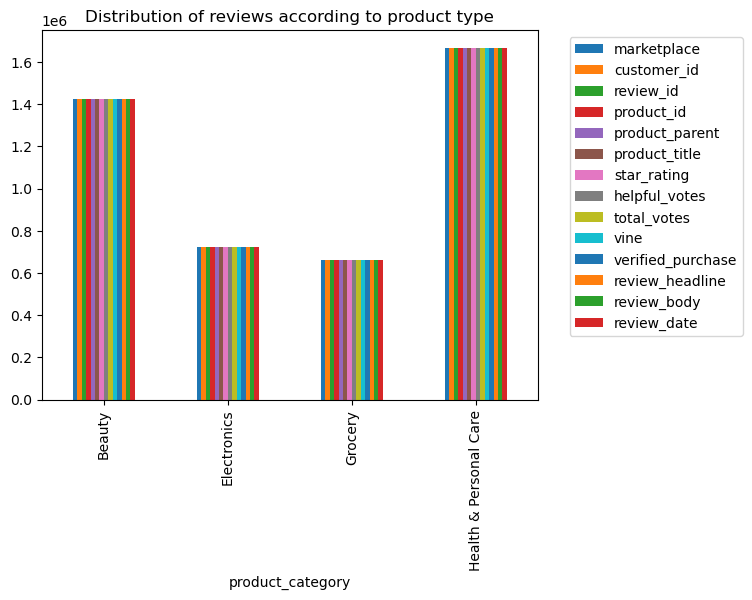

In [14]:
import matplotlib.pyplot as plt

# Increase figure size
plt.figure(figsize=(10, 5))  # Adjust width and height as needed

# Plot data
show_data = df.groupby('product_category').count().plot(kind='bar', title='Distribution of reviews according to product type')

# Move legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


C:\Users\Karthik\AppData\Local\Temp\ipykernel_20816\4116262054.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(


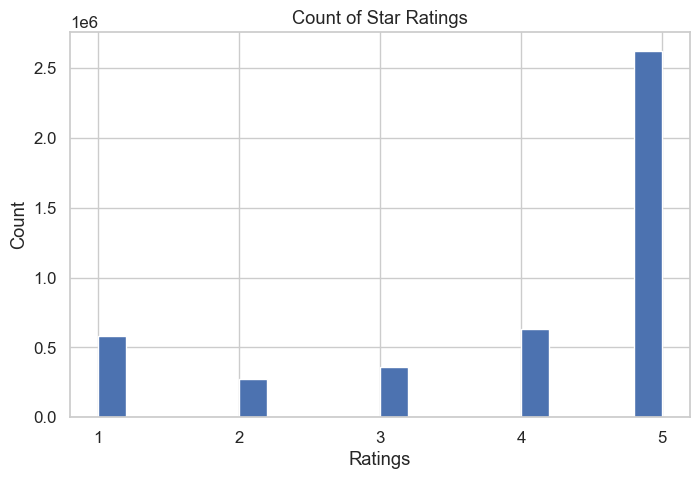

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and figure size
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

# Plot histogram
ax = sns.distplot(
     df['star_rating'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
)

# Set x-axis ticks to display only integer values from 1 to 5
ax.set_xticks(range(1, 6))

# Set labels and title
ax.set(xlabel='Ratings', ylabel='Count', title="Count of Star Ratings")

# Show plot
plt.show()


In [8]:
df['review_text'] = df['review_headline'] + ". " + df['review_body']
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_text
0,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31,Five Stars. Works pissa
1,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31,Overall pleased with the item. Works well. Bass is somewhat lacking but is present. Overall pleased with the item.
2,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Bookshelf Loudspeakers,Electronics,5.0,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,2015-08-31,Five Stars. The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.
3,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB and iPod Digital Interface (Black),Electronics,2.0,4.0,5.0,N,Y,It does not copy CD-R s to USB as advertised ...,It does not copy CD-R s to USB as advertised. My CD's were recorded on a Sony machine and properly finalized. They copy on other machines.<br />It repeatedly shows &#34;copy protected wait&#34;.<b...,2015-08-31,It does not copy CD-R s to USB as advertised .... It does not copy CD-R s to USB as advertised. My CD's were recorded on a Sony machine and properly finalized. They copy on other machines.<br />It...
4,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,2.0,1.0,1.0,N,Y,"Did not last long, Stop working within a year ...","Did not last long, Stop working within a year.",2015-08-31,"Did not last long, Stop working within a year .... Did not last long, Stop working within a year."


In [9]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

def clean_text(df, text_field, new_text_field_name):
    # Lowercase the text
    df[new_text_field_name] = df[text_field].str.lower()
    
    # Remove special characters, URLs.
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|http.+?", "", elem))
    
    # Remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    # Tokenize the text
#     
    
    # Lemmatize the text
#     
    
    return df


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Cleaning the data using clean_text function

data = clean_text(df, 'review_text', 'clean_text')
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_text,clean_text
0,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31,Five Stars. Works pissa,five stars works pissa
1,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31,Overall pleased with the item. Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,overall pleased with the item works well bass is somewhat lacking but is present overall pleased with the item
2,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Bookshelf Loudspeakers,Electronics,5.0,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,2015-08-31,Five Stars. The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,five stars the quality on these speakers is insanely good and doesnt sound muddy when adjusting bass very happy with these
3,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB and iPod Digital Interface (Black),Electronics,2.0,4.0,5.0,N,Y,It does not copy CD-R s to USB as advertised ...,It does not copy CD-R s to USB as advertised. My CD's were recorded on a Sony machine and properly finalized. They copy on other machines.<br />It repeatedly shows &#34;copy protected wait&#34;.<b...,2015-08-31,It does not copy CD-R s to USB as advertised .... It does not copy CD-R s to USB as advertised. My CD's were recorded on a Sony machine and properly finalized. They copy on other machines.<br />It...,it does not copy cdr s to usb as advertised it does not copy cdr s to usb as advertised my cds were recorded on a sony machine and properly finalized they copy on other machinesbr it repeatedly s...
4,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,2.0,1.0,1.0,N,Y,"Did not last long, Stop working within a year ...","Did not last long, Stop working within a year.",2015-08-31,"Did not last long, Stop working within a year .... Did not last long, Stop working within a year.",did not last long stop working within a year did not last long stop working within a year


In [11]:
data.to_csv('C:/Users/Karthik/Downloads/Amazon review data/clean_reviews_amazon.csv', index=False)

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/Karthik/Downloads/Amazon review data/clean_reviews_amazon.csv')

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords and word tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Define batch size
batch_size = 100000
j=1;
# Function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words])

# Load data
# Replace this with your actual DataFrame loading code
# df = pd.read_csv('your_data.csv')

# Define a function to apply stop word removal to a batch
def process_batch(df, start_index, end_index):
    df.loc[start_index:end_index, 'clean_text'] = df.loc[start_index:end_index, 'clean_text'].apply(remove_stopwords)

# Apply stop word removal in batches
for i in range(0, len(df), batch_size):
    process_batch(df, i, min(i+batch_size, len(df)-1))
    print(f"{batch_size * j} rows processed")
    j=j+1




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100000 rows processed
200000 rows processed
300000 rows processed
400000 rows processed
500000 rows processed
600000 rows processed
700000 rows processed
800000 rows processed
900000 rows processed
1000000 rows processed
1100000 rows processed
1200000 rows processed
1300000 rows processed
1400000 rows processed
1500000 rows processed
1600000 rows processed
1700000 rows processed
1800000 rows processed
1900000 rows processed
2000000 rows processed
2100000 rows processed
2200000 rows processed
2300000 rows processed
2400000 rows processed
2500000 rows processed
2600000 rows processed
2700000 rows processed
2800000 rows processed
2900000 rows processed
3000000 rows processed
3100000 rows processed
3200000 rows processed
3300000 rows processed
3400000 rows processed
3500000 rows processed
3600000 rows processed
3700000 rows processed
3800000 rows processed
3900000 rows processed
4000000 rows processed
4100000 rows processed
4200000 rows processed
4300000 rows processed
4400000 rows process

In [5]:
df['clean_text'].head()

0                               five stars works pissa
1    overall pleased item works well bass somewhat ...
2    five stars quality speakers insanely good does...
3    copy cdr usb advertised copy cdr usb advertise...
4    last long stop working within year last long s...
Name: clean_text, dtype: object

In [6]:
df.to_csv('C:/Users/Karthik/Downloads/Amazon review data/clean_reviews_amazon.csv', index=False)

    *******************************

In [8]:
# import pandas as pd
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# import nltk

# # Download word tokenizer and WordNet corpus
# nltk.download('punkt')
# nltk.download('wordnet')

# # Define batch size
# batch_size = 100000
# j = 1

# # Function for lemmatization
# def lemmatize_text(text):
#     lemmatizer = WordNetLemmatizer()
#     return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

# # Define a function to apply stop word removal and lemmatization to a batch
# def process_batch(df, start_index, end_index):
#     df.loc[start_index:end_index, 'clean_text'] = df.loc[start_index:end_index, 'clean_text'].apply(lemmatize_text)

# # Applylemmatization in batches
# for i in range(0, len(df), batch_size):
#     process_batch(df, i, min(i+batch_size, len(df)-1))
#     print(f"{batch_size * j} rows processed")
#     j += 1

# df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


100000 rows processed
200000 rows processed
300000 rows processed
400000 rows processed
500000 rows processed
600000 rows processed
700000 rows processed
800000 rows processed
900000 rows processed
1000000 rows processed
1100000 rows processed
1200000 rows processed
1300000 rows processed
1400000 rows processed
1500000 rows processed
1600000 rows processed
1700000 rows processed
1800000 rows processed
1900000 rows processed
2000000 rows processed
2100000 rows processed
2200000 rows processed
2300000 rows processed
2400000 rows processed
2500000 rows processed
2600000 rows processed
2700000 rows processed
2800000 rows processed
2900000 rows processed
3000000 rows processed
3100000 rows processed
3200000 rows processed
3300000 rows processed
3400000 rows processed
3500000 rows processed
3600000 rows processed
3700000 rows processed
3800000 rows processed
3900000 rows processed
4000000 rows processed
4100000 rows processed
4200000 rows processed
4300000 rows processed
4400000 rows process

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_text,clean_text
0,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31,Five Stars. Works pissa,five star work pissa
1,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31,Overall pleased with the item. Works well. Bas...,overall pleased item work well bass somewhat l...
2,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Books...,Electronics,5.0,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good...,2015-08-31,Five Stars. The quality on these speakers is i...,five star quality speaker insanely good doesnt...
3,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB an...,Electronics,2.0,4.0,5.0,N,Y,It does not copy CD-R s to USB as advertised ...,It does not copy CD-R s to USB as advertised. ...,2015-08-31,It does not copy CD-R s to USB as advertised ....,copy cdr usb advertised copy cdr usb advertise...
4,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,2.0,1.0,1.0,N,Y,"Did not last long, Stop working within a year ...","Did not last long, Stop working within a year.",2015-08-31,"Did not last long, Stop working within a year ...",last long stop working within year last long s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478254,US,49527495,R2646S9QB77229,B000050FDQ,168516715,Braun 7526 Syncro Shaver System with Clean & C...,Beauty,5.0,5.0,6.0,N,Y,Another great Braun product...,I've been using Braun shavers for about 8 year...,2001-01-23,Another great Braun product.... I've been usin...,another great braun product ive using braun sh...
4478255,US,53094487,R2PF35TSQS67UZ,B000050FF2,678848064,Homedics Envirascape Sound Spa Alarm Clock Radio,Beauty,3.0,106.0,109.0,N,Y,"For the price, a good unit",I've had more than my share of these things ov...,2001-01-14,"For the price, a good unit. I've had more than...",price good unit ive share thing last couple ye...
4478256,US,52928084,R10PLGJXPJDVAL,B000050FEO,4337406,HoMedics Bubble Spa Massaging Bubble Mat,Beauty,1.0,26.0,27.0,N,Y,Annoying instead of relaxing!,I bought this for my wife as a Christmas prese...,2001-01-05,Annoying instead of relaxing!. I bought this f...,annoying instead relaxing bought wife christma...
4478257,US,50845095,RA9E8VI2M2NPP,B000050B6G,117229122,Conair GMT180QCS/GMT180TDCS Rechargeable Beard...,Beauty,5.0,2.0,3.0,N,Y,Very nice,This is an excellent trimmer. My friend apprec...,2000-12-27,Very nice. This is an excellent trimmer. My fr...,nice excellent trimmer friend appreciated deal...


In [14]:
# df1 = df['clean_text']
# df1.to_csv('C:/Users/Karthik/Downloads/Amazon review data/Lem_review_no_pos.csv', index=False)
# df1

0                                       five star work pissa
1          overall pleased item work well bass somewhat l...
2          five star quality speaker insanely good doesnt...
3          copy cdr usb advertised copy cdr usb advertise...
4          last long stop working within year last long s...
                                 ...                        
4478254    another great braun product ive using braun sh...
4478255    price good unit ive share thing last couple ye...
4478256    annoying instead relaxing bought wife christma...
4478257    nice excellent trimmer friend appreciated deal...
4478258    melt easily originally reviewed paraffin pearl...
Name: clean_text, Length: 4478259, dtype: object

# ***********************

# POS tagging and lemmatization

In [2]:
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet

# # Download necessary resources
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

# def get_wordnet_pos(treebank_tag):
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN  # default to noun if no match

# def lemmatize_text(text):
#     lemmatizer = WordNetLemmatizer()
#     tokens = word_tokenize(text)
#     tagged_tokens = nltk.pos_tag(tokens)
#     lemmatized_tokens = []
#     for token, tag in tagged_tokens:
#         pos = get_wordnet_pos(tag)
#         lemma = lemmatizer.lemmatize(token, pos=pos)
#         lemmatized_tokens.append(lemma)
#     return ' '.join(lemmatized_tokens)

# # Example usage
# text = "nice excellent trimmer friend appreciated deal."
# lemmatized_text = lemmatize_text(text)
# print(lemmatized_text)


In [15]:
data= pd.read_csv('C:/Users/Karthik/Downloads/Amazon review data/clean_reviews_amazon.csv')
data['clean_text'].head()

0                               five stars works pissa
1    overall pleased item works well bass somewhat ...
2    five stars quality speakers insanely good does...
3    copy cdr usb advertised copy cdr usb advertise...
4    last long stop working within year last long s...
Name: clean_text, dtype: object

In [18]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download word tokenizer and WordNet corpus
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Define batch size
batch_size = 100000
j = 1

# Function for lemmatization with POS tagging
def lemmatize_text_with_pos(text):
    if not isinstance(text, str):
        text = str(text)  # Convert non-string inputs to string
    
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(token, pos=pos)
        lemmatized_tokens.append(lemma)
    return ' '.join(lemmatized_tokens)


# Define a function to apply lemmatization with POS tagging to a batch
def process_batch_with_pos(df, start_index, end_index):
    df.loc[start_index:end_index, 'clean_text'] = df.loc[start_index:end_index, 'clean_text'].apply(lemmatize_text_with_pos)

# Apply lemmatization with POS tagging in batches
for i in range(0, len(data), batch_size):
    process_batch_with_pos(data, i, min(i+batch_size, len(data)-1))
    print(f"{batch_size * j} rows processed")
    j += 1

# Output the processed DataFrame
data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


100000 rows processed
200000 rows processed
300000 rows processed
400000 rows processed
500000 rows processed
600000 rows processed
700000 rows processed
800000 rows processed
900000 rows processed
1000000 rows processed
1100000 rows processed
1200000 rows processed
1300000 rows processed
1400000 rows processed
1500000 rows processed
1600000 rows processed
1700000 rows processed
1800000 rows processed
1900000 rows processed
2000000 rows processed
2100000 rows processed
2200000 rows processed
2300000 rows processed
2400000 rows processed
2500000 rows processed
2600000 rows processed
2700000 rows processed
2800000 rows processed
2900000 rows processed
3000000 rows processed
3100000 rows processed
3200000 rows processed
3300000 rows processed
3400000 rows processed
3500000 rows processed
3600000 rows processed
3700000 rows processed
3800000 rows processed
3900000 rows processed
4000000 rows processed
4100000 rows processed
4200000 rows processed
4300000 rows processed
4400000 rows process

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_text,clean_text
0,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31,Five Stars. Works pissa,five star work pissa
1,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31,Overall pleased with the item. Works well. Bas...,overall pleased item work well bass somewhat l...
2,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Books...,Electronics,5.0,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good...,2015-08-31,Five Stars. The quality on these speakers is i...,five star quality speaker insanely good doesnt...
3,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB an...,Electronics,2.0,4.0,5.0,N,Y,It does not copy CD-R s to USB as advertised ...,It does not copy CD-R s to USB as advertised. ...,2015-08-31,It does not copy CD-R s to USB as advertised ....,copy cdr usb advertise copy cdr usb advertise ...
4,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,2.0,1.0,1.0,N,Y,"Did not last long, Stop working within a year ...","Did not last long, Stop working within a year.",2015-08-31,"Did not last long, Stop working within a year ...",last long stop working within year last long s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478254,US,49527495,R2646S9QB77229,B000050FDQ,168516715,Braun 7526 Syncro Shaver System with Clean & C...,Beauty,5.0,5.0,6.0,N,Y,Another great Braun product...,I've been using Braun shavers for about 8 year...,2001-01-23,Another great Braun product.... I've been usin...,another great braun product ive use braun shav...
4478255,US,53094487,R2PF35TSQS67UZ,B000050FF2,678848064,Homedics Envirascape Sound Spa Alarm Clock Radio,Beauty,3.0,106.0,109.0,N,Y,"For the price, a good unit",I've had more than my share of these things ov...,2001-01-14,"For the price, a good unit. I've had more than...",price good unit ive share thing last couple ye...
4478256,US,52928084,R10PLGJXPJDVAL,B000050FEO,4337406,HoMedics Bubble Spa Massaging Bubble Mat,Beauty,1.0,26.0,27.0,N,Y,Annoying instead of relaxing!,I bought this for my wife as a Christmas prese...,2001-01-05,Annoying instead of relaxing!. I bought this f...,annoy instead relax buy wife christmas present...
4478257,US,50845095,RA9E8VI2M2NPP,B000050B6G,117229122,Conair GMT180QCS/GMT180TDCS Rechargeable Beard...,Beauty,5.0,2.0,3.0,N,Y,Very nice,This is an excellent trimmer. My friend apprec...,2000-12-27,Very nice. This is an excellent trimmer. My fr...,nice excellent trimmer friend appreciate deal ...


In [19]:
data.to_csv('C:/Users/Karthik/Downloads/Amazon review data/clean_reviews_amazon.csv', index=False)

In [36]:
import pandas as pd
data_clean = pd.read_csv('C:/Users/Karthik/Downloads/Amazon review data/clean_reviews_amazon.csv')
data_clean

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_text,clean_text
0,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31,Five Stars. Works pissa,five star work pissa
1,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31,Overall pleased with the item. Works well. Bas...,overall pleased item work well bass somewhat l...
2,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Books...,Electronics,5.0,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good...,2015-08-31,Five Stars. The quality on these speakers is i...,five star quality speaker insanely good doesnt...
3,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB an...,Electronics,2.0,4.0,5.0,N,Y,It does not copy CD-R s to USB as advertised ...,It does not copy CD-R s to USB as advertised. ...,2015-08-31,It does not copy CD-R s to USB as advertised ....,copy cdr usb advertise copy cdr usb advertise ...
4,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,2.0,1.0,1.0,N,Y,"Did not last long, Stop working within a year ...","Did not last long, Stop working within a year.",2015-08-31,"Did not last long, Stop working within a year ...",last long stop working within year last long s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478254,US,49527495,R2646S9QB77229,B000050FDQ,168516715,Braun 7526 Syncro Shaver System with Clean & C...,Beauty,5.0,5.0,6.0,N,Y,Another great Braun product...,I've been using Braun shavers for about 8 year...,2001-01-23,Another great Braun product.... I've been usin...,another great braun product ive use braun shav...
4478255,US,53094487,R2PF35TSQS67UZ,B000050FF2,678848064,Homedics Envirascape Sound Spa Alarm Clock Radio,Beauty,3.0,106.0,109.0,N,Y,"For the price, a good unit",I've had more than my share of these things ov...,2001-01-14,"For the price, a good unit. I've had more than...",price good unit ive share thing last couple ye...
4478256,US,52928084,R10PLGJXPJDVAL,B000050FEO,4337406,HoMedics Bubble Spa Massaging Bubble Mat,Beauty,1.0,26.0,27.0,N,Y,Annoying instead of relaxing!,I bought this for my wife as a Christmas prese...,2001-01-05,Annoying instead of relaxing!. I bought this f...,annoy instead relax buy wife christmas present...
4478257,US,50845095,RA9E8VI2M2NPP,B000050B6G,117229122,Conair GMT180QCS/GMT180TDCS Rechargeable Beard...,Beauty,5.0,2.0,3.0,N,Y,Very nice,This is an excellent trimmer. My friend apprec...,2000-12-27,Very nice. This is an excellent trimmer. My fr...,nice excellent trimmer friend appreciate deal ...


In [43]:
data_clean.isna().sum()

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline       0
review_body           0
review_date           0
review_text           0
clean_text           82
dtype: int64

In [44]:
data_clean=data_clean.dropna()

In [103]:
# Randomly select 100,000 rows
data = data_clean.sample(n=100000, random_state=65)

# Display the randomly selected sample
data = data[['customer_id', 'product_id', 'product_category', 'product_title', 'star_rating', 'clean_text']]

In [104]:
# Count the number of rows with rating 5
num_rating_5 = (data['star_rating'] == 5).sum()

# If there are fewer than 20,000 rows with rating 5, just remove all of them
if num_rating_5 <= 2000:
    data_without_rating_5 = data[data['star_rating'] != 5]
# Otherwise, remove 20,000 rows with rating 5
else:
    data_without_rating_5 = data.drop(data[data['star_rating'] == 5].sample(n=num_rating_5 - 20000, random_state=42).index)

# Display the resulting sample
data = data_without_rating_5[['customer_id', 'product_id', 'product_category', 'product_title', 'star_rating', 'clean_text']]
# print(data)


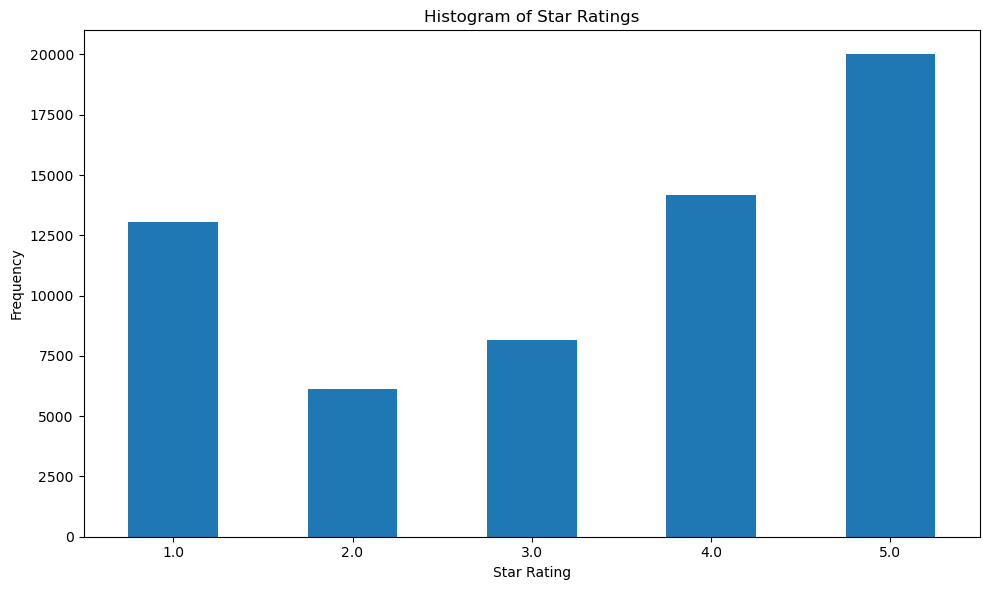

In [105]:
import matplotlib.pyplot as plt

# Count the occurrences of each star rating
star_rating_counts = data['star_rating'].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(10, 6))
star_rating_counts.plot(kind='bar')
plt.title('Histogram of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels to prevent overlap
plt.tight_layout()
plt.show()


In [75]:
# # Stratified sampling to ensure balanced representation of ratings
# data = data_clean.groupby('star_rating', group_keys=False).apply(lambda x: x.sample(min(len(x), 15000), random_state=32))

# # Display the randomly selected sample
# data = data[['customer_id', 'product_id', 'product_category', 'product_title', 'star_rating', 'clean_text']]

In [76]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# data['star_rating'].value_counts().plot(kind='bar')
# plt.title('Histogram of Product Categories')
# plt.xlabel('Product Category')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [106]:
data.shape

(61517, 6)

In [107]:
import pandas as pd
import re

# Assuming df is your DataFrame with the 'clean_text' column
# Define a function to remove short words and consecutive repeated characters
def clean_text(text):
    # Remove words with size less than 3
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    # Remove consecutive repeated characters more than 3 times
    text = re.sub(r'(.)\1{2,}', '', text)
    return text

# Apply the cleaning function to the 'clean_text' column
data['text'] = data['clean_text'].apply(clean_text)


In [109]:
clean_reviewData=data['text']

In [111]:
# from spellchecker import SpellChecker

# # Initialize the spell checker
# spell = SpellChecker()

# # Function to remove misspelled words from text
# def remove_misspelled_words(text):
#     # Tokenize the text
#     words = text.split()
#     # Remove misspelled words
#     corrected_words = []
#     for word in words:
#         # Check if the word has a correction
#         corrected_word = spell.correction(word)
#         if corrected_word is not None:
#             corrected_words.append(corrected_word)
#     # Join the corrected words back into text
#     return ' '.join(corrected_words)

# # List to store processed texts after each batch
# processed_texts_batches = []

# # Set the batch size
# batch_size = 10000

# # Iterate over the data in batches
# for i in range(0, len(clean_reviewData), batch_size):
#     batch_data = clean_reviewData[i:i+batch_size]
    
#     # List to store processed texts in the current batch
#     processed_texts_batch = []
    
#     # Process each text in the current batch
#     for text in batch_data:
#         processed_text = remove_misspelled_words(text)
#         processed_texts_batch.append(processed_text)
    
#     # Append the processed texts of the current batch to the list
#     processed_texts_batches.append(processed_texts_batch)
#     print(f"Batch {i} processed: {i*batch_size} rows processed\n")

# # Now, processed_texts_batches contains the processed texts from each batch


In [108]:
data

,customer_id,product_id,product_category,product_title,star_rating,clean_text,text
4045387,38862059,B0095SERK2,Beauty,SureWells Nice wigs New Products 10% Off Fashi...,4.0,resent good one bad one make good wig come lon...,resent good one bad one make good wig come lon...
3659399,21653427,B0002EB0O4,Beauty,LEG MAGIC-RICH BEIGE,5.0,minimizes age spot work schoolage child always...,minimizes age spot work schoolage child always...
1514224,41748048,B003MUQRWU,Health & Personal Care,All Good Goop,3.0,seem help bit use hand rock climb seem help bi...,seem help bit use hand rock climb seem help bi...
2764742,53027522,B006B3PWLW,Grocery,Flora Dried Fruit and Nut Gift Tray,1.0,huge disappointment product nowhere close quai...,huge disappointment product nowhere close quai...
1051141,24036154,B00QJLV2N8,Health & Personal Care,New Authentic Cobra Libre 2 Male Massager Black,2.0,charge connection easily slip short touch hita...,charge connection easily slip short touch hita...
...,...,...,...,...,...,...,...
34328,11893876,B00VU7ZSQS,Electronics,JVC HAFX102A XX Xtreme Bass Earbuds,5.0,basshead great sound quality loud basshead dre...,basshead great sound quality loud basshead dre...
4271164,18379777,B000PLUZL8,Beauty,Salicylic Acid 20% Gel Peel,2.0,make skin dry peel product several month reall...,make skin dry peel product several month reall...
1807479,11645286,B000KOMFJA,Health & Personal Care,Lofthouse's Fisherman's Friend Menthol Cough S...,4.0,fisherman friend work werent taste would perfe...,fisherman friend work werent taste would perfe...
522232,17297037,B000WPGRKK,Electronics,Motorola Signal Booster 4-Port BDA-S4 Cable Mo...,4.0,work geat order arrive sooner advertised use a...,work geat order arrive sooner advertised use a...


In [112]:
data.to_csv('C:/Users/Karthik/Downloads/Amazon review data/NLP project final.csv', index=False)

In [69]:
data=pd.read_csv('C:/Users/Karthik/Downloads/Amazon review data/NLP project final.csv')

In [50]:
data.isna().sum()

customer_id         0
product_id          0
product_category    0
product_title       0
star_rating         0
clean_text          0
text                2
dtype: int64

In [51]:
data=data.dropna()

In [52]:
clean_reviewData=data['text']

In [114]:
Most_used_Words_text =pd.Series(' '.join(clean_reviewData).lower().split()).value_counts()[:20]
print(Most_used_Words_text)

use        32192
product    29772
good       22963
work       22750
get        21104
like       20329
one        19754
great      19617
well       14922
would      14570
buy        14149
make       13338
time       12110
dont       10886
take       10869
love       10606
really     10275
try        10217
hair       10196
look        9441
dtype: int64


In [115]:
import nltk
from collections import Counter

# Tokenize the text and calculate word frequencies
def analyze_text(corpus):
    # Tokenize the text
    tokens = nltk.word_tokenize(corpus)
    
    # Calculate word frequencies
    word_freq = Counter(tokens)
    
    # Summary statistics
    word_count = sum(word_freq.values())
    num_unique_words = len(word_freq)
    
    return word_count, num_unique_words 

# Example DataFrame column
text_column = clean_reviewData  # Replace 'text_column' with the name of your text column

# Analyze entire dataset
total_word_count = 0
total_unique_words = Counter()

for text in text_column:
    word_count, num_unique_words = analyze_text(text)
    total_word_count += word_count
    total_unique_words.update(nltk.word_tokenize(text))

# Print summary statistics for the entire dataset
print("Total word count:", total_word_count)
print("Total number of unique words:", len(total_unique_words))


Total word count: 2207494
Total number of unique words: 64648


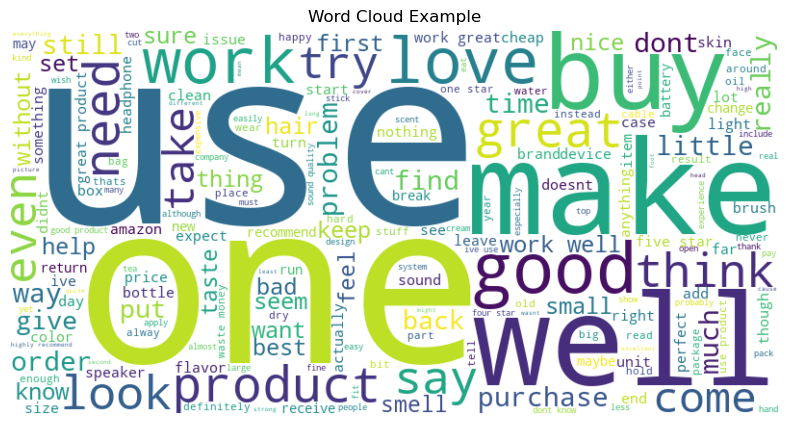

In [125]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# def draw_word_cloud(text, title="Word Cloud"):
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(title)
#     plt.axis('off')
#     plt.show()

# # Example usage:
# text = " ".join(clean_reviewData)  # Combine all texts into a single string
# draw_word_cloud(text, title="Word Cloud Example")


In [53]:
# vocabulary = len(total_unique_words)
vocabulary = 64648

from sklearn.feature_extraction.text import TfidfVectorizer
text_vectorizer = TfidfVectorizer(min_df=4, max_features=vocabulary)
vectors = text_vectorizer.fit_transform(clean_reviewData)
tfidf_feature_names = text_vectorizer.get_feature_names_out()

In [55]:
import joblib

# Fit the TF-IDF vectorizer to your data
text_vectorizer.fit(clean_reviewData)

# Save the fitted vectorizer to a file
joblib.dump(text_vectorizer, 'tfidf_vectorizer.pkl')

# Now the fitted TF-IDF vectorizer is saved as 'tfidf_vectorizer.pkl' in your local system


['tfidf_vectorizer.pkl']

In [120]:
vocabulary

64648

In [38]:
# vectors.shape

(4478060, 10240)

In [1]:
# tfidf_feature_names[:20]

In [124]:
import numpy as np

# Assuming vectors is already calculated

batch_size = 50000  # Adjust batch size as needed
num_instances = vectors.shape[0]
num_features = vectors.shape[1]
num_batches = (num_instances + batch_size - 1) // batch_size

X_batches = []

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, num_instances)
    
    batch_vectors = vectors[start_idx:end_idx]
    
    batch_X = batch_vectors.toarray()
    X_batches.append(batch_X)
    
    print(f"Processed {end_idx} out of {num_instances} instances")

# Concatenate all batches
X = np.concatenate(X_batches, axis=0)


Processed 50000 out of 61517 instances
Processed 61517 out of 61517 instances


In [139]:
vec_data=X

In [140]:
vec_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
review_data =np.array(clean_reviewData)
review_data

array(['five star work pissa',
       'overall pleased item work well bass somewhat lacking present overall pleased item',
       'five star quality speaker insanely good doesnt sound muddy adjust bass happy',
       ...,
       'annoy instead relax buy wife christmas present love bubble bath first saw think wonderful present actually tried different story way back amazon refundbr whats wrong mat suppose attach bottom tub suction cup small dont really work mat fill air like sit small partially inflated air mattress mat float around flop around constantly mat contains small block hard foamlike material embed x inch uncomfortable sit must weight mat make rigid either case dont work brief trial air hose pop several time bubble weak dont really give massage wasnt expect jacuzzilike experience thought would provide little force mat rather long one oval style tub find many new home mat long work need traditional rectangular tub finally unit rather noisybr concept product great however think 

In [28]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
sample_review = review_data[:10]
for test in sample_review:
    # Perform sentiment analysis using analyser
    sentiment_score = analyser.polarity_scores(test)
    print(test)
    print(sentiment_score, '\n')
    


five star work pissa
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

overall pleased item work well bass somewhat lacking present overall pleased item
{'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.7845} 

five star quality speaker insanely good doesnt sound muddy adjust bass happy
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.765} 

copy cdr usb advertise copy cdr usb advertise cd record sony machine properly finalize copy machinesbr repeatedly show copy protect waitbr none cdr copy protect want machine copy cdr collection usb
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.6705} 

last long stop working within year last long stop working within year
{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.5267} 

great hdmi converter great little device need convert micro mini hdmi full hdmi want buy new cablesbr far mine work greatbr small size easy carry computer tabletbr carry audio like hdmi cable
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound':

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
from sklearn.cluster import MiniBatchKMeans

clusters = 4
kmeans_model = MiniBatchKMeans(n_clusters=clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmodel = kmeans_model.fit(vector)
kmodel_clusters = kmodel.predict(vector)
kmodel_distances = kmodel.transform(vector)
centroids = kmodel.cluster_centers_.argsort()[:, ::-1]
values = text_vectorizer.get_feature_names_out()
for i in range(clusters):
    print("Cluster %d:" % i)
    for j in centroids[i, :5]:
        print(' %s' % values[j])
    print()

Cluster 0:
 product
 hair
 use
 great
 skin

Cluster 1:
 great
 love
 taste
 good
 like

Cluster 2:
 work
 use
 get
 one
 good

Cluster 3:
 star
 five
 great
 four
 love



In [152]:
# test_reviewText = review_data
Ratings = data['star_rating']
# text_vectorizer = TfidfVectorizer(max_df=.8)
# text_vectorizer.fit(test_reviewText)
def rate(r):
    ary2 = []
    for rating in r:
        # Convert the rating to an integer
        rating_int = int(rating)
        # Create a one-hot encoded representation of the rating
        tv = [0, 0, 0, 0, 0]
        tv[rating_int - 1] = 1
        ary2.append(tv)
    return np.array(ary2)


In [153]:
y=rate(Ratings)
y

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [70]:
product_ids = data['product_id']

In [71]:
from sklearn.preprocessing import LabelEncoder

# Assuming product_ids is a list of product IDs
label_encoder = LabelEncoder()
encoded_product_ids = label_encoder.fit_transform(product_ids)


In [72]:
user_ids = data['customer_id']

In [85]:
from sklearn.preprocessing import LabelEncoder

# # Assuming product_ids is a list of product IDs
# label_encoder = LabelEncoder()
encoded_user_ids = label_encoder.fit_transform(user_ids)


# saving the encoded data

In [81]:
item_data=data[['product_id']]
item_data['encoded_product_id']=encoded_product_ids
item_data

C:\Users\Karthik\AppData\Local\Temp\ipykernel_3692\2492082911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['encoded_product_id']=encoded_product_ids


,product_id,encoded_product_id
0,B0095SERK2,32800
1,B0002EB0O4,1572
2,B003MUQRWU,19695
3,B006B3PWLW,27871
4,B00QJLV2N8,46077
...,...,...
61512,B00VU7ZSQS,46970
61513,B000PLUZL8,6906
61514,B000KOMFJA,5697
61515,B000WPGRKK,8246


In [82]:
# Assuming 'item_data' is your DataFrame containing item data
item_data.drop_duplicates(inplace=True)

C:\Users\Karthik\AppData\Local\Temp\ipykernel_3692\3564757825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data.drop_duplicates(inplace=True)


In [83]:
item_data.shape

(47201, 2)

In [90]:
item_data.to_csv('C:/Users/Karthik/Downloads/Amazon review data/product data.csv', index=False)

customer data

In [86]:
user_data=data[['customer_id']]
user_data['encoded_user_id']=encoded_user_ids
user_data

C:\Users\Karthik\AppData\Local\Temp\ipykernel_3692\3972988232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['encoded_user_id']=encoded_user_ids


,customer_id,encoded_user_id
0,38862059,41166
1,21653427,24119
2,41748048,43914
3,53027522,60115
4,24036154,26897
...,...,...
61512,11893876,8942
61513,18379777,20242
61514,11645286,8521
61515,17297037,18956


In [91]:
# Assuming 'item_data' is your DataFrame containing item data
user_data.drop_duplicates(inplace=True)
user_data.to_csv('C:/Users/Karthik/Downloads/Amazon review data/user data.csv', index=False)

C:\Users\Karthik\AppData\Local\Temp\ipykernel_3692\3739708410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data.drop_duplicates(inplace=True)


In [135]:
encoded_product_ids

array([32800,  1572, 19695, ...,  5697,  8246, 31977])

In [136]:
#2 inp
import numpy as np

X = []

for i in range(vec_data.shape[0]):
    # Create an array containing a vector and an encoded product ID
    instance = [vec_data[i], encoded_product_ids[i], encoded_user_ids[i]]
    X.append(instance)

# Convert X to a NumPy array


In [203]:
#3inp
import numpy as np

X = []

for i in range(vec_data.shape[0]):
    # Create an array containing a vector and an encoded product ID
    instance = [vec_data[i], encoded_product_ids[i], encoded_user_ids[i]]
    X.append(instance)

# Convert X to a NumPy array


In [204]:
X

[[array([0., 0., 0., ..., 0., 0., 0.]), 32800, 41166],
 [array([0., 0., 0., ..., 0., 0., 0.]), 1572, 24119],
 [array([0., 0., 0., ..., 0., 0., 0.]), 19695, 43914],
 [array([0., 0., 0., ..., 0., 0., 0.]), 27871, 60115],
 [array([0., 0., 0., ..., 0., 0., 0.]), 46077, 26897],
 [array([0., 0., 0., ..., 0., 0., 0.]), 31460, 22286],
 [array([0., 0., 0., ..., 0., 0., 0.]), 14606, 53799],
 [array([0., 0., 0., ..., 0., 0., 0.]), 25425, 23226],
 [array([0., 0., 0., ..., 0., 0., 0.]), 18181, 39891],
 [array([0., 0., 0., ..., 0., 0., 0.]), 46677, 37795],
 [array([0., 0., 0., ..., 0., 0., 0.]), 44152, 418],
 [array([0., 0., 0., ..., 0., 0., 0.]), 27029, 36684],
 [array([0., 0., 0., ..., 0., 0., 0.]), 21146, 32362],
 [array([0., 0., 0., ..., 0., 0., 0.]), 45178, 19250],
 [array([0., 0., 0., ..., 0., 0., 0.]), 23586, 45136],
 [array([0., 0., 0., ..., 0., 0., 0.]), 16997, 54814],
 [array([0., 0., 0., ..., 0., 0., 0.]), 35153, 13004],
 [array([0., 0., 0., ..., 0., 0., 0.]), 21239, 7839],
 [array([0., 0

In [154]:
y

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [26]:
# y = rate(Ratings.astype(int))  # Convert ratings to integers

In [205]:
from sklearn.model_selection import train_test_split

# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [160]:
X_train

[[array([0., 0., 0., ..., 0., 0., 0.]), 7724],
 [array([0., 0., 0., ..., 0., 0., 0.]), 1399],
 [array([0., 0., 0., ..., 0., 0., 0.]), 12055],
 [array([0., 0., 0., ..., 0., 0., 0.]), 6445],
 [array([0., 0., 0., ..., 0., 0., 0.]), 6332],
 [array([0., 0., 0., ..., 0., 0., 0.]), 25847],
 [array([0., 0., 0., ..., 0., 0., 0.]), 45012],
 [array([0., 0., 0., ..., 0., 0., 0.]), 40174],
 [array([0., 0., 0., ..., 0., 0., 0.]), 15613],
 [array([0., 0., 0., ..., 0., 0., 0.]), 15795],
 [array([0., 0., 0., ..., 0., 0., 0.]), 43838],
 [array([0., 0., 0., ..., 0., 0., 0.]), 37924],
 [array([0., 0., 0., ..., 0., 0., 0.]), 18017],
 [array([0., 0., 0., ..., 0., 0., 0.]), 11987],
 [array([0., 0., 0., ..., 0., 0., 0.]), 44686],
 [array([0., 0., 0., ..., 0., 0., 0.]), 11295],
 [array([0., 0., 0., ..., 0., 0., 0.]), 46944],
 [array([0., 0., 0., ..., 0., 0., 0.]), 42581],
 [array([0., 0., 0., ..., 0., 0., 0.]), 45568],
 [array([0., 0., 0., ..., 0., 0., 0.]), 4590],
 [array([0., 0., 0., ..., 0., 0., 0.]), 10309

In [187]:
import numpy as np

# Unpack the elements of X_train, y_train, X_test, and y_test
X_train_array = np.array([instance[0] for instance in X_train])
X_train_product_ids = np.array([instance[1] for instance in X_train])
y_train_array = np.array(y_train)
X_test_array = np.array([instance[0] for instance in X_test])
X_test_product_ids = np.array([instance[1] for instance in X_test])
y_test_array = np.array(y_test)

# # Save the arrays to your local system
# np.save('X_train.npy', X_train_array)
# np.save('X_train_product_ids.npy', X_train_product_ids)
# np.save('y_train.npy', y_train_array)
# np.save('X_test.npy', X_test_array)
# np.save('X_test_product_ids.npy', X_test_product_ids)
# np.save('y_test.npy', y_test_array)


In [188]:
X_train_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [189]:
X_train_product_ids

array([15154, 13939, 36374, ..., 36673, 32849, 25560])

In [190]:
y_train_array

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [195]:
from tensorflow.keras.layers import Input, Embedding, LSTM, concatenate, Dense, Reshape, Dropout
from tensorflow.keras.models import Model

vocab_size = len(np.unique(encoded_product_ids))

# Define input layers
vector_input = Input(shape=(X_train_array.shape[1],), name='vector_input')
label_input = Input(shape=(1,), name='label_input')

# Embedding layer for label input
label_embedding = Embedding(input_dim=vocab_size, output_dim=64)(label_input)
label_embedding = Flatten()(label_embedding)

# LSTM layer for vector input
reshaped_vector_input = Reshape((1, X_train_array.shape[1]))(vector_input)
lstm_output = LSTM(128)(reshaped_vector_input)

# Add Dropout layer after LSTM
lstm_output = Dropout(0.5)(lstm_output)

# Concatenate LSTM output and label embedding
concatenated = concatenate([lstm_output, label_embedding])

# Add Dropout layer after concatenation
concatenated = Dropout(0.5)(concatenated)

# Dense layer for multi-class classification
output = Dense(5, activation='softmax')(concatenated)

# Define the model
model = Model(inputs=[vector_input, label_input], outputs=output)

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 vector_input (InputLayer)   [(None, 14787)]              0         []                            
                                                                                                  
 reshape_1 (Reshape)         (None, 1, 14787)             0         ['vector_input[0][0]']        
                                                                                                  
 label_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 lstm_6 (LSTM)               (None, 128)                  7636992   ['reshape_1[0][0]']           
                                                                                            

In [196]:
history = model.fit([X_train_array, X_train_product_ids], y_train_array, batch_size=64, epochs=5,  validation_split=0.2)

Epoch 1/5
616/616 [==============================] - 40s 60ms/step - loss: 1.4061 - accuracy: 0.4068 - val_loss: 1.1909 - val_accuracy: 0.5472
Epoch 2/5
616/616 [==============================] - 35s 57ms/step - loss: 1.0883 - accuracy: 0.5702 - val_loss: 1.0207 - val_accuracy: 0.5896
Epoch 3/5
616/616 [==============================] - 35s 57ms/step - loss: 0.9797 - accuracy: 0.6157 - val_loss: 0.9872 - val_accuracy: 0.6023
Epoch 4/5
616/616 [==============================] - 35s 57ms/step - loss: 0.9116 - accuracy: 0.6512 - val_loss: 0.9796 - val_accuracy: 0.6061
Epoch 5/5
616/616 [==============================] - 36s 59ms/step - loss: 0.8399 - accuracy: 0.6903 - val_loss: 0.9826 - val_accuracy: 0.6032


In [197]:
model.save('rating_model.h5')

C:\Users\Karthik\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [199]:
# Evaluate the Model
loss, accuracy = model.evaluate([X_test_array, X_test_product_ids], y_test_array)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


385/385 [==============================] - 2s 5ms/step - loss: 1.0020 - accuracy: 0.5932
Test Loss: 1.0020304918289185
Test Accuracy: 0.5932217240333557


### uiser id input model

In [207]:
from sklearn.model_selection import train_test_split

# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [206]:
import numpy as np

# Unpack the elements of X_train, y_train, X_test, and y_test
X_train_array_2 = np.array([instance[0] for instance in X_train])
X_train_product_ids_2 = np.array([instance[1] for instance in X_train])
X_train_user_ids_2 = np.array([instance[2] for instance in X_train])
y_train_array_2 = np.array(y_train)

X_test_array_2 = np.array([instance[0] for instance in X_test])
X_test_product_ids_2 = np.array([instance[1] for instance in X_test])
X_test_user_ids_2 = np.array([instance[2] for instance in X_test])
y_test_array_2 = np.array(y_test)




In [208]:
# Save the arrays to your local system
np.save('X_train_3inp.npy', X_train_array_2)
np.save('X_train_product_ids_3inp.npy', X_train_product_ids_2)
np.save('X_train_user_ids_3inp.npy', X_train_user_ids_2)
np.save('y_train_3inp.npy', y_train_array_2)

np.save('X_test_3inp.npy', X_test_array_2)
np.save('X_test_product_ids_3inp.npy', X_test_product_ids_2)
np.save('X_test_user_ids_3inp.npy', X_test_user_ids_2)
np.save('y_test_3inp.npy', y_test_array_2)

In [213]:
from tensorflow.keras.layers import Input, Embedding, LSTM, concatenate, Dense, Reshape, Dropout
from tensorflow.keras.models import Model

vocab_size_1 = len(np.unique(encoded_product_ids))
vocab_size_2 = len(np.unique(encoded_user_ids))

# Define input layers
vector_input = Input(shape=(X_train_array.shape[1],), name='vector_input')
int_input1 = Input(shape=(1,), name='product id')
int_input2 = Input(shape=(1,), name='user id')

# Embedding layer for label input
label_embedding_1 = Embedding(input_dim=vocab_size_1, output_dim=64)(int_input1)
label_embedding_1 = Flatten()(label_embedding_1)

# Embedding layer for label input
label_embedding_2 = Embedding(input_dim=vocab_size_2, output_dim=64)(int_input2)
label_embedding_2 = Flatten()(label_embedding_2)


# LSTM layer for vector input
reshaped_vector_input = Reshape((1, X_train_array.shape[1]))(vector_input)
lstm_output = LSTM(128)(reshaped_vector_input)

# Add Dropout layer after LSTM
lstm_output = Dropout(0.5)(lstm_output)

# Concatenate LSTM output, label embedding, and int input
concatenated = concatenate([lstm_output, label_embedding_1, label_embedding_2])

# Add Dropout layer after concatenation
concatenated = Dropout(0.5)(concatenated)

# Dense layer for multi-class classification
output = Dense(5, activation='softmax')(concatenated)

# Define the model
model_3inp = Model(inputs=[vector_input, int_input1, int_input2], outputs=output)

# Compile the model
model_3inp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_3inp.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 vector_input (InputLayer)   [(None, 14787)]              0         []                            
                                                                                                  
 reshape_4 (Reshape)         (None, 1, 14787)             0         ['vector_input[0][0]']        
                                                                                                  
 product id (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 user id (InputLayer)        [(None, 1)]                  0         []                            
                                                                                            

In [214]:
history_3inp = model_3inp.fit([X_train_array_2, X_train_product_ids_2, X_train_user_ids_2], y_train_array_2, batch_size=64, epochs=5,  validation_split=0.2)

Epoch 1/5
616/616 [==============================] - 43s 66ms/step - loss: 1.4307 - accuracy: 0.3918 - val_loss: 1.2361 - val_accuracy: 0.5218
Epoch 2/5
616/616 [==============================] - 37s 61ms/step - loss: 1.0999 - accuracy: 0.5717 - val_loss: 1.0494 - val_accuracy: 0.5775
Epoch 3/5
616/616 [==============================] - 37s 61ms/step - loss: 0.9663 - accuracy: 0.6267 - val_loss: 1.0147 - val_accuracy: 0.5916
Epoch 4/5
616/616 [==============================] - 38s 61ms/step - loss: 0.8688 - accuracy: 0.6788 - val_loss: 1.0087 - val_accuracy: 0.5899
Epoch 5/5
616/616 [==============================] - 38s 62ms/step - loss: 0.7557 - accuracy: 0.7397 - val_loss: 1.0137 - val_accuracy: 0.5842


In [218]:
model_3inp.save('rating_model_3inp.h5')

In [219]:
# Evaluate the Model
loss, accuracy = model_3inp.evaluate([X_test_array_2, X_test_product_ids_2, X_test_user_ids_2], y_test_array_2)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


385/385 [==============================] - 2s 5ms/step - loss: 0.9920 - accuracy: 0.5920
Test Loss: 0.9919864535331726
Test Accuracy: 0.5920026302337646


# pipeline user inp


In [26]:
data=pd.read_csv('C:/Users/Karthik/Downloads/Amazon review data/NLP project final.csv')
data.head()

,customer_id,product_id,product_category,product_title,star_rating,clean_text,text
0,38862059,B0095SERK2,Beauty,SureWells Nice wigs New Products 10% Off Fashion Costume & Cosplay Straight Wigs Bob Medium Blonde Hair Wigs,4.0,resent good one bad one make good wig come long one side flip miss sewn part front bang area good price didnt high expectation still let however send new one finegood customer care,resent good one bad one make good wig come long one side flip miss sewn part front bang area good price didnt high expectation still let however send new one finegood customer care
1,21653427,B0002EB0O4,Beauty,LEG MAGIC-RICH BEIGE,5.0,minimizes age spot work schoolage child always notice age spots hand remember use product year ago think would try hand work well always dont feel selfconscious around kid,minimizes age spot work schoolage child always notice age spots hand remember use product year ago think would try hand work well always dont feel selfconscious around kid
2,41748048,B003MUQRWU,Health & Personal Care,All Good Goop,3.0,seem help bit use hand rock climb seem help bit say skin still fall apart miracle worker product pretty greasy seem absorb fairly quicklybr br ive also use climb metolius climber hand repair balm ...,seem help bit use hand rock climb seem help bit say skin still fall apart miracle worker product pretty greasy seem absorb fairly quicklybr ive also use climb metolius climber hand repair balm pro...
3,53027522,B006B3PWLW,Grocery,Flora Dried Fruit and Nut Gift Tray,1.0,huge disappointment product nowhere close quailty others comment disappoint nowhere close worth purchase price even color dry fruit considerbly different example photography consider return even o...,huge disappointment product nowhere close quailty others comment disappoint nowhere close worth purchase price even color dry fruit considerbly different example photography consider return even o...
4,24036154,B00QJLV2N8,Health & Personal Care,New Authentic Cobra Libre 2 Male Massager Black,2.0,charge connection easily slip short touch hitachi wand strong vibration even cobra libre work doesnt provide deep satisfaction fleshlight tenga flip hole large men charge instruction clear need ho...,charge connection easily slip short touch hitachi wand strong vibration even cobra libre work doesnt provide deep satisfaction fleshlight tenga flip hole large men charge instruction clear need ho...


In [3]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', data['customer_id'].nunique())
print('Number of unique ITEMS in Raw data = ', data['product_id'].nunique())

Number of unique USERS in Raw data =  60346
Number of unique ITEMS in Raw data =  47201


In [37]:
import pandas as pd

# Assuming 'data' is your DataFrame
sampled_data = data.sample(n=50, random_state=42)  # Adjust the random_state for reproducibility

# Display the first few rows of the sampled data

In [219]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', sampled_data['customer_id'].nunique())
print('Number of unique ITEMS in Raw data = ', sampled_data['product_id'].nunique())

Number of unique USERS in Raw data =  50
Number of unique ITEMS in Raw data =  50


In [213]:
# Example text
example_text = "Need a good hair product that works well with dandruff #cool Hair Products"

# Preprocess text
processed_text = preprocess_text(example_text)

# Print processed text
print("Processed Text:")
print(processed_text)


Processed Text:
need good hair product work well dandruff cool hair product


In [220]:
# new_text_vector_dense.countvalues

In [215]:
import numpy as np

# Count the number of non-zero elements in the vector
non_zero_count = np.count_nonzero(new_text_vector_dense)

print("Number of non-zero elements in the vector:", non_zero_count)


Number of non-zero elements in the vector: 8


In [103]:
print(sampled_data.columns)

Index(['customer_id_x', 'product_id', 'product_category', 'product_title',
       'star_rating', 'clean_text', 'text', 'customer_id_y',
       'encoded_user_id'],
      dtype='object')


In [34]:
import pandas as pd

# Load the user dataset
user_dataset = pd.read_csv('C:/Users/Karthik/Downloads/Amazon review data/user data.csv')

# Load the item dataset
item_dataset = pd.read_csv('C:/Users/Karthik/Downloads/Amazon review data/product data.csv')


In [35]:
# Merge with user dataset to map customer IDs to encoded user IDs
sampled_data = sampled_data.merge(user_dataset, how='left', left_on='customer_id', right_on='customer_id')

# Merge with item dataset to map product IDs to encoded product IDs
sampled_data = sampled_data.merge(item_dataset, how='left', left_on='product_id', right_on='product_id')

# Now sampled_dataset contains the encoded_user_id and encoded_product_id columns
# You can access them as sampled_dataset['encoded_user_id'] and sampled_dataset['encoded_product_id']




In [38]:
# Optionally, you can drop the original customer_id and product_id columns if needed
sampled_data.drop(['clean_text', 'text'], axis=1, inplace=True)

In [39]:
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = sampled_data.pivot(index = 'customer_id', columns ='product_id', values = 'star_rating')
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)


# #Finding the possible number of ratings as per the number of users and products
# possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
# print('possible_num_of_ratings = ', possible_num_of_ratings)

# #Density of ratings
# density = (given_num_of_ratings/possible_num_of_ratings)
# density *= 100
# print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (50, 50)


product_id,B0000511YT,B0009I4M0W,B000AQFQC6,B000GCOHVA,B000LRH7GC,B000QHSEDW,B000VUIK9W,B0018OIC16,B001G7PU24,B001OOLLVS,...,B00DYPMF7Y,B00F3FUG7E,B00FOXDSUC,B00KWBC4ME,B00LQZ06G6,B00LSGUL9A,B00NAR0D9S,B00OQCP2C4,B00QJQ2KG6,B00XT4QP2G
customer_id,,,,,,,,,,,,,,,,,,,,,
500223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
869611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1187658,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2050383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
10201136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
# Counting NaN values in the final_ratings_matrix
nan_count = final_ratings_matrix.isna().sum().sum()
print("Number of NaN values:", nan_count)


Number of NaN values: 2450


In [237]:
sampled_dataset=sampled_data

In [238]:
import pandas as pd

# Assuming you have already loaded the user and item datasets and merged them with the sampled dataset
# If not, you can load the datasets and merge them as described in the previous code snippet

# Get unique user IDs and product IDs
unique_user_ids = sampled_dataset['encoded_user_id'].unique()
unique_product_ids = sampled_dataset['encoded_product_id'].unique()

# Create a DataFrame to store the cartesian product
cartesian_df = pd.DataFrame(columns=['encoded_user_id', 'encoded_product_id'])

# Iterate over each unique user ID and product ID to create the cartesian product
rows = []
for user_id in unique_user_ids:
    for product_id in unique_product_ids:
        rows.append({'encoded_user_id': user_id, 'encoded_product_id': product_id})

# Concatenate the rows into the DataFrame
cartesian_df = pd.concat([cartesian_df, pd.DataFrame(rows)])

# Reset index
cartesian_df.reset_index(drop=True, inplace=True)

# Now cartesian_df contains the cartesian product of user IDs and product IDs


In [239]:
cartesian_df['encoded_product_id'].nunique()

50

In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if not recognized

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove special characters, URLs
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|http.+?", "", text)
    
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # POS Tagging
    tagged_tokens = nltk.pos_tag(tokens)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(token, pos=pos)
        lemmatized_tokens.append(lemma)
    
    # Join tokens back into text
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text


In [22]:
example_txt = "Need a good hair product"

In [66]:
import joblib

# Load the saved vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')


# Transform the new text using the loaded TF-IDF vectorizer
new_text_vector = loaded_vectorizer.transform([processed_text])

# Convert the sparse matrix representation into a dense array and take the first row
new_text_vector_dense = new_text_vector.toarray()[0]


In [199]:
import joblib

# Load the saved vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')


# Transform the new text using the loaded TF-IDF vectorizer
new_text_vector = loaded_vectorizer.transform([processed_text])

# Convert the sparse matrix representation into a dense array and take the first row
new_text_vector_dense = new_text_vector.toarray()[0]


In [240]:
import pandas as pd
import numpy as np  # Assuming your vector is a NumPy array

cartesian_df['vector'] = [new_text_vector_dense] * len(cartesian_df)

# Now every row in the 'new_column' will have the same array as its element
cartesian_df

,encoded_user_id,encoded_product_id,vector
0,9509,30449,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,9509,12560,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,9509,14157,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,9509,20826,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,9509,8043,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
2495,54224,16831,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2496,54224,39798,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2497,54224,29688,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2498,54224,47106,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [241]:
vector=np.array(cartesian_df['vector'])
user=cartesian_df['encoded_user_id']
product=cartesian_df['encoded_product_id']

In [242]:
vector

array([array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]), ...,
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.])], dtype=object)

In [243]:
import numpy as np

X = []

for i in range(user.shape[0]):
    # Create an array containing a vector and an encoded product ID
    instance = [vector[i], user[i], product[i]]
    X.append(instance)

# Convert X to a NumPy array


In [257]:
vector = np.array([instance[0] for instance in X])
user = np.array([instance[1] for instance in X])
item = np.array([instance[2] for instance in X])

array([ 9509,  9509,  9509, ..., 54224, 54224, 54224])

## model

In [263]:
from tensorflow.keras.models import load_model
# Assuming you have a DataFrame named sampled_matrix with input features in its columns

# Load the model
model = load_model('rating_model_3inp.h5')

In [264]:
# Assuming you have loaded the user, item, and vector data
# Convert them to NumPy arrays
vector_array = np.array([instance[0] for instance in X])
user_array = np.array([instance[1] for instance in X])
item_array = np.array([instance[2] for instance in X])

# Reshape the arrays if necessary
# For example, if the model expects 2D arrays with shape (batch_size, input_shape),
# you can reshape the arrays like this:
vector_array = np.reshape(vector_array, (len(vector_array), -1))  # Assuming vector_array is a 2D array

# Make predictions on the tensors
predictions = model.predict([vector_array, item_array, user_array])


79/79 [==============================] - 4s 31ms/step


In [2]:
# predictions

In [283]:
max_indices = np.argmax(predictions, axis=1)

# Create a new array with all zeros
one_hot_encoded = np.zeros_like(output_probabilities)

# Set the maximum value to 1 in each row
one_hot_encoded[np.arange(len(max_indices)), max_indices] = 1

print(one_hot_encoded)


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [285]:
integer_values = np.argmax(binary_mask, axis=1) + 1

print(integer_values)

[4 4 4 ... 4 4 4]


In [286]:
np.unique(integer_values)

array([4, 5], dtype=int64)

In [287]:
cartesian_df['ratings']=integer_values
cartesian_df

,encoded_user_id,encoded_product_id,vector,ratings
0,9509,30449,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
1,9509,12560,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
2,9509,14157,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
3,9509,20826,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
4,9509,8043,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
...,...,...,...,...
2495,54224,16831,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
2496,54224,39798,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
2497,54224,29688,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
2498,54224,47106,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4


### recommendations

In [ ]:
cartesian_df

In [295]:
import pandas as pd

# Assuming you have cartesian_df and sampled_dataset DataFrames available

# Merge cartesian_df with sampled_dataset for product IDs
merged_df_product = pd.merge(cartesian_df, sampled_dataset[['encoded_product_id', 'product_id']], 
                              how='left', on='encoded_product_id')

# Merge cartesian_df with sampled_dataset for user IDs
merged_df = pd.merge(merged_df_product, sampled_dataset[['encoded_user_id', 'customer_id']], 
                           how='left', on='encoded_user_id')

# Rename the columns to reflect the real IDs
merged_df.rename(columns={'product_id': 'real_product_id', 'customer_id': 'real_user_id'}, inplace=True)

# Now you have the cartesian_df DataFrame with real product and user IDs added


In [298]:
rating_matrix = pd.pivot_table(merged_df, values='ratings', index='real_user_id', columns='real_product_id', fill_value=0)
rating_matrix

real_product_id,B0000511YT,B0009I4M0W,B000AQFQC6,B000GCOHVA,B000LRH7GC,B000QHSEDW,B000VUIK9W,B0018OIC16,B001G7PU24,B001OOLLVS,...,B00DYPMF7Y,B00F3FUG7E,B00FOXDSUC,B00KWBC4ME,B00LQZ06G6,B00LSGUL9A,B00NAR0D9S,B00OQCP2C4,B00QJQ2KG6,B00XT4QP2G
real_user_id,,,,,,,,,,,,,,,,,,,,,
500223,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
869611,4,4,4,4,5,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1187658,4,4,4,4,5,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2050383,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
10201136,4,4,4,4,5,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
10754864,5,4,4,5,5,5,5,5,4,4,...,5,4,5,5,4,5,4,5,4,5
11163611,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
11668039,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
11775592,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [300]:
merged_df.head()

,encoded_user_id,encoded_product_id,vector,ratings,real_product_id,real_user_id
0,9509,30449,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,B007WTVOF2,12141356
1,9509,12560,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,B001G7PU24,12141356
2,9509,14157,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,B001TKE47A,12141356
3,9509,20826,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,B003YZAEQI,12141356
4,9509,8043,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,B000VUIK9W,12141356


In [302]:
#Calculate the average rating for each product 
average_rating = merged_df.groupby('real_product_id').mean()['ratings']

#Calculate the count of ratings for each product
count_rating = merged_df.groupby('real_product_id').count()['ratings']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

C:\Users\Karthik\AppData\Local\Temp\ipykernel_3692\2884330100.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating = merged_df.groupby('real_product_id').mean()['ratings']


,avg_rating,rating_count
real_product_id,,
B00280M134,4.76,50
B000LRH7GC,4.50,50
B00DL4N0O0,4.44,50
B00BDMVKA8,4.32,50
B00DS842HS,4.24,50


In [309]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):
    
    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    
    return recommendations.index[:n]

In [326]:
ids=list(top_n_products(final_rating, 15, 49))

In [327]:
# Filter sampled_dataset for the rows corresponding to these product IDs
filtered_products = sampled_dataset[sampled_dataset['product_id'].isin(ids)]

# Print the product titles
filtered_products[['product_id', 'product_title', 'product_category']]


,product_id,product_title,product_category
4,B000VUIK9W,"LifeVantage Protandim Dietary Supplement,30 caplets",Health & Personal Care
6,B00280M134,"Garden of Life Vitamin E - Vitamin Code Raw E Vitamin 250 IU Whole Food Supplement with A, D, K and Selenium, Vegetarian, 60 Capsules",Health & Personal Care
9,B00KWBC4ME,"Natura BCAA Capsules - Natural Branched Chain Amino Acids - Pre Workout Dietary Supplement for Men and Women - Pure BCAAs for Recovery, Weight Loss, Build Lean and Burn Muscle.",Health & Personal Care
14,B00BDMVKA8,"Spicy World Bulk Raw Natural Whole Cashews, 5 Pound",Grocery
16,B002RBTVGY,"Lindt LINDOR Peanut Butter Milk Chocolate Truffles, 60 Count Box",Grocery
17,B0050VKEWS,Zote Laundry Bar Soap,Beauty
18,B00BK71I7Q,SmartyPants Adult Complete Gummy Vitamins,Health & Personal Care
22,B00LSGUL9A,"Utimi Silent Wireless Remote Control Waterproof 20 Modes Vibrating Love Egg, Strong Vibration Love Egg Massager Women's Flirting Sex Toy Masturbators Love Egg Clit Stimulating Vibrator for Women",Health & Personal Care
24,B00DL4N0O0,"Rimmel Lash Accelerator Mascara Endless, Extreme Black, 0.33 Fluid Ounce",Beauty
30,B00DYPMF7Y,"Vega Sport Pre-Workout Energizer, Lemon Lime",Health & Personal Care


#### user based

In [344]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
user_encoder = LabelEncoder()
users=merged_df['real_user_id'].unique()
# Fit LabelEncoder to the user IDs in the sampled dataset
user_encoder.fit(users)

# Transform the real user IDs to encoded labels
merged_df['user_index'] = user_encoder.transform(merged_df['real_user_id'])


In [373]:
merged_df=merged_df[['user_index','encoded_user_id','real_user_id', 'encoded_product_id', 'real_product_id','ratings' ]]
merged_df

,user_index,encoded_user_id,real_user_id,encoded_product_id,real_product_id,ratings
0,9,9509,12141356,30449,B007WTVOF2,4
1,9,9509,12141356,12560,B001G7PU24,4
2,9,9509,12141356,14157,B001TKE47A,4
3,9,9509,12141356,20826,B003YZAEQI,4
4,9,9509,12141356,8043,B000VUIK9W,4
...,...,...,...,...,...,...
2495,43,54224,49810194,16831,B002SPV068,4
2496,43,54224,49810194,39798,B00FOXDSUC,4
2497,43,54224,49810194,29688,B007JG2PGU,4
2498,43,54224,49810194,47106,B00XT4QP2G,4


In [374]:
merged_df.to_csv('C:/Users/Karthik/Downloads/Amazon review data/data_to_get_recommendation.csv', index=False)

In [3]:
merged_df=pd.read_csv('C:/Users/Karthik/Downloads/Amazon review data/data_to_get_recommendation.csv')

In [4]:
rating_matrix_user = pd.pivot_table(merged_df, values='ratings', index='user_index', columns='real_product_id', fill_value=0)
rating_matrix_user


real_product_id,B0000511YT,B0009I4M0W,B000AQFQC6,B000GCOHVA,B000LRH7GC,B000QHSEDW,B000VUIK9W,B0018OIC16,B001G7PU24,B001OOLLVS,...,B00DYPMF7Y,B00F3FUG7E,B00FOXDSUC,B00KWBC4ME,B00LQZ06G6,B00LSGUL9A,B00NAR0D9S,B00OQCP2C4,B00QJQ2KG6,B00XT4QP2G
user_index,,,,,,,,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,4,4,4,4,5,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,4,4,4,4,5,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,5,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,5,4,4,5,5,5,5,5,4,4,...,5,4,5,5,4,5,4,5,4,5
6,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [5]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list
   
    #Remove the original user and its similarity score and keep only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

similar = similar_users(3,rating_matrix_user)[0][0:10]
similar
     

[7, 10, 18, 32, 33, 37, 41, 42, 46, 47]

In [49]:
filtered_df = merged_df[merged_df['user_index'].isin(similar)]

# Retrieve the real user IDs from the filtered DataFrame
user_ids = filtered_df.set_index('user_index')['real_user_id'].tolist()
users = np.unique(user_ids)
users

array([11668039, 12450620, 20756918, 40216040, 41467274, 45328953,
       49488790, 49588095, 50714126, 51832992])

In [46]:
# similar_users(1,rating_matrix_user)[1][0:10]

In [53]:
user_interactions = sampled_data[sampled_data['customer_id'].isin(users)]

# Extract product IDs used by these users
products_used = user_interactions['product_id'].unique()

print("Recommended products:")
print(products_used)

Recommended products:
['B001G7PU24' 'B0009I4M0W' 'B00LQZ06G6' 'B00BDMVKA8' 'B005JXFRFG'
 'B0089F2NY4' 'B004HGFL3E' 'B002WJHC58' 'B005DI8S26' 'B00FOXDSUC']


In [55]:
# Filter sampled_dataset for the rows corresponding to these product IDs
rec_prod= sampled_data[sampled_data['product_id'].isin(products_used)]

# Print the product titles
rec_prod[['product_id', 'product_title', 'product_category']]


,product_id,product_title,product_category
29156,B001G7PU24,Olay Total Effects Revitalizing Foaming Cleanser 6.5 Fl Oz (Pack of 2),Beauty
26881,B0009I4M0W,"TIGI Catwalk Curls Rock Curly Hair Conditioner, 8.5 Ounce (Pack of 2)",Beauty
8235,B00LQZ06G6,"Back to 20s® Nipple Enlargement & Enhancer - Firmer, Perkier, Larger Nipples (small (dia 1.8cm), 1 pair)",Health & Personal Care
28501,B00BDMVKA8,"Spicy World Bulk Raw Natural Whole Cashews, 5 Pound",Grocery
49762,B005JXFRFG,"Headgear Replaces: Respironics. Deluxe Black Universal 4-Point Attachment Headgear, each",Beauty
49287,B0089F2NY4,"MegaSlim Extra Strength Weight Loss Combo. Two in One for Quicker Weight Loss. Appetite Suppressant, Active Fat Burner and Liver Detox. Guaranteed Fast Results.",Health & Personal Care
16461,B004HGFL3E,Nordic Naturals - Arctic Cod Liver Oil (Lemon) - 180ct,Health & Personal Care
31960,B002WJHC58,Mucus-Clear,Health & Personal Care
22536,B005DI8S26,Sleep Wave Rest & Relax,Health & Personal Care
20450,B00FOXDSUC,"100% Pure Garcinia Cambogia Extract with 80% HCA, Weight Loss Diet Pills for Women and Men, Lose Weight Fast, Lose Belly Fat, All Natural Appetite Suppressant, Carb Blocker and Weight Loss Supplement",Health & Personal Care


In [56]:
sampled_data[sampled_data['customer_id'] == 1187658]

,customer_id,product_id,product_category,product_title,star_rating
4162,1187658,B000VUIK9W,Health & Personal Care,"LifeVantage Protandim Dietary Supplement,30 caplets",2.0
